In [170]:
import pandas as pd
import os

def read_spam():
    category = 'spam'
    directory = './enron1/enron1/spam'
    return read_category(category, directory)

def read_ham():
    category = 'ham'
    directory='./enron1/enron1/ham'
    return read_category(category, directory)

def read_category(category, directory):
    emails = []
    for filename in os.listdir(directory):
        if not filename.endswith(".txt"):
            continue
        with open(os.path.join(directory, filename), 'r') as fp:
            try:
                content = fp.read()
                emails.append({'name': filename, 'content': content, 'category': category})
            except:
                print(f'skipped {filename}')
    return emails

ham = read_ham()
spam = read_spam()

df = pd.DataFrame.from_records(ham)
df = df.append(pd.DataFrame.from_records(spam))

skipped 2248.2004-09-23.GP.spam.txt
skipped 2526.2004-10-17.GP.spam.txt
skipped 2698.2004-10-31.GP.spam.txt
skipped 4566.2005-05-24.GP.spam.txt


C:\Users\SAMPURNA\AppData\Local\Temp\ipykernel_5472\341569708.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(spam))


In [171]:
import re
def preprocessor(e):
 pass

In [172]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5168 entries, 0 to 1495
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      5168 non-null   object
 1   content   5168 non-null   object
 2   category  5168 non-null   object
dtypes: object(3)
memory usage: 161.5+ KB


In [174]:
df.columns

Index(['name', 'content', 'category'], dtype='object')

In [175]:
df

,name,content,category
0,0001.1999-12-10.farmer.ham.txt,Subject: christmas tree farm pictures\n,ham
1,0002.1999-12-13.farmer.ham.txt,"Subject: vastar resources , inc .\ngary , prod...",ham
2,0003.1999-12-14.farmer.ham.txt,Subject: calpine daily gas nomination\n- calpi...,ham
3,0004.1999-12-14.farmer.ham.txt,Subject: re : issue\nfyi - see note below - al...,ham
4,0005.1999-12-14.farmer.ham.txt,Subject: meter 7268 nov allocation\nfyi .\n- -...,ham
...,...,...,...
1491,5163.2005-09-06.GP.spam.txt,Subject: our pro - forma invoice attached\ndiv...,spam
1492,5164.2005-09-06.GP.spam.txt,Subject: str _ rndlen ( 2 - 4 ) } { extra _ ti...,spam
1493,5167.2005-09-06.GP.spam.txt,Subject: check me out !\n61 bb\nhey derm\nbbbb...,spam
1494,5170.2005-09-06.GP.spam.txt,Subject: hot jobs\nglobal marketing specialtie...,spam


In [176]:
#CountVectorizer
text=['5167.2005-09-06.GP.spam.txt']
count_vect=CountVectorizer()
count_matrix=count_vect.fit_transform(text)

count_array=count_matrix.toarray()
df1=pd.DataFrame(data=count_array,columns=count_vect.get_feature_names_out())
print(df1)

   06  09  2005  5167  gp  spam  txt
0   1   1     1     1   1     1    1


In [177]:
df.head()

,name,content,category
0,0001.1999-12-10.farmer.ham.txt,Subject: christmas tree farm pictures\n,ham
1,0002.1999-12-13.farmer.ham.txt,"Subject: vastar resources , inc .\ngary , prod...",ham
2,0003.1999-12-14.farmer.ham.txt,Subject: calpine daily gas nomination\n- calpi...,ham
3,0004.1999-12-14.farmer.ham.txt,Subject: re : issue\nfyi - see note below - al...,ham
4,0005.1999-12-14.farmer.ham.txt,Subject: meter 7268 nov allocation\nfyi .\n- -...,ham


In [290]:
df.shape

(5168, 3)

In [291]:
df.loc[df['category']=='spam','category']=0
df.loc[df['category']=='ham','category']=1

In [292]:
#split data into train and test
X=df['content'].values
y=df['category'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=3)
print(X.shape,X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(5168,) (4134,) (1034,) (4134,) (1034,)


In [357]:
count_vect1=CountVectorizer(min_df=1,stop_words='english',lowercase=True)


In [359]:
X_train_f=count_vect1.transform(X_train)
X_test_f=count_vect1.transform(X_test)

In [312]:
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

In [313]:
model=LogisticRegression()

In [314]:
model.fit(X_train_f,Y_train)

LogisticRegression()

In [315]:
print(model.intercept_)

[-1.55279542]


In [316]:
print(model.coef_)

[[ 0.51111503  0.22136591 -0.00583665 ... -0.02783016  0.
   0.        ]]


In [318]:
import matplotlib.pyplot as plt
%matplotlib inline


In [319]:
predictions=model.predict(X_train_f)

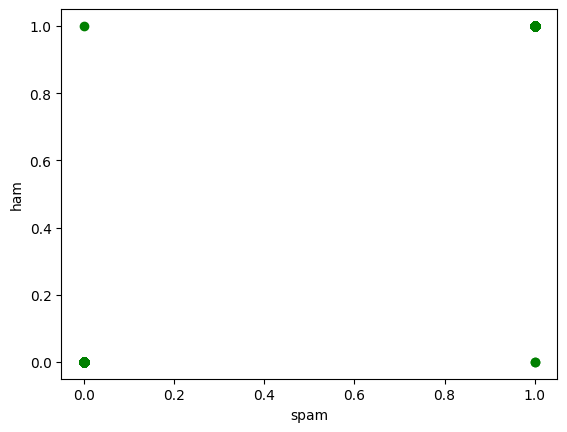

In [320]:
import matplotlib.pyplot as plt
plt.scatter(Y_train,predictions,color='green')
plt.xlabel("spam")
plt.ylabel("ham")
plt.show()

In [321]:
accuracy=accuracy_score(Y_train,predictions)
accuracy

0.9992743105950653

In [322]:
predictions1=model.predict(X_test_f)

In [323]:
accuracy1=accuracy_score(Y_test,predictions1)
accuracy1

0.9806576402321083

In [324]:
confusion_matrix(Y_train,predictions)

array([[1205,    1],
       [   2, 2926]], dtype=int64)

In [333]:
classification_report(Y_test,predictions1)

'              precision    recall  f1-score   support\n\n           0       0.95      0.98      0.97       290\n           1       0.99      0.98      0.99       744\n\n    accuracy                           0.98      1034\n   macro avg       0.97      0.98      0.98      1034\nweighted avg       0.98      0.98      0.98      1034\n'

In [336]:
print(count_vect1._check_vocabulary)

<bound method _VectorizerMixin._check_vocabulary of CountVectorizer(stop_words='english')>


In [337]:
print(model.coef_[0])

[ 0.51111503  0.22136591 -0.00583665 ... -0.02783016  0.
  0.        ]


In [348]:
count_vect1.get_feature_names_out()

array(['00', '000', '0000', ..., 'zyban', 'zynve', 'zzsyt'], dtype=object)

In [349]:
count_vect1.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'